In [1]:
import itertools
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# load data
summary = pickle.load(open('crossval_summary.pickle', 'rb'))
results = pickle.load(open('crossval_results.pickle', 'rb'))

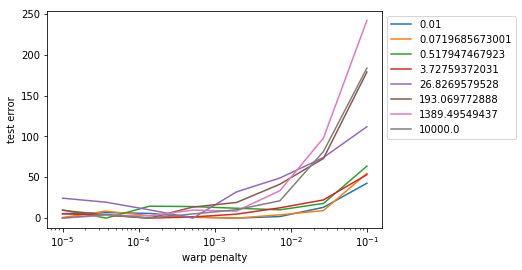

In [12]:
mean_test_error = summary['test_error'].mean(axis=-1)
plt.plot(summary['warp_penalties'][:, 0], mean_test_error - mean_test_error.min(axis=0))
plt.xscale('log')
plt.legend(summary['time_penalties'][0], bbox_to_anchor=(1, 1))
plt.ylabel('test error')
plt.xlabel('warp penalty')

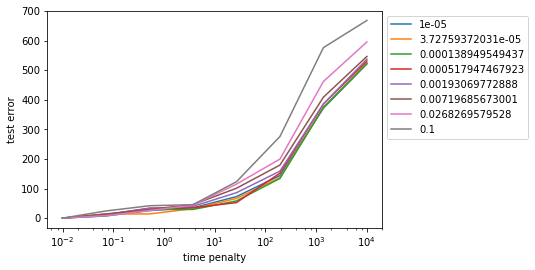

In [18]:
plt.plot(summary['time_penalties'][0], mean_test_error.T - mean_test_error.T.min(axis=0))
plt.xscale('log')
plt.legend(summary['warp_penalties'][:,0], bbox_to_anchor=(1,1))
plt.ylabel('test error')
plt.xlabel('time penalty')

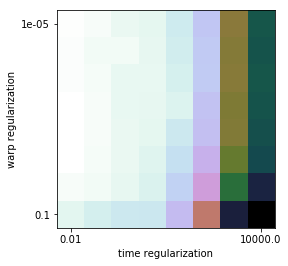

In [84]:
fig, ax = plt.subplots(1, 1)
ax.imshow(mean_test_error, cmap='cubehelix_r')
ax.set_xticks([0, 7])
ax.set_xticklabels([np.mean(summary['time_penalties'][:,0]), np.mean(summary['time_penalties'][:,7])])
ax.set_yticks([0, 7])
ax.set_yticklabels([np.mean(summary['warp_penalties'][0,:]), np.mean(summary['warp_penalties'][7,:])])
ax.set_xlabel('time regularization')
ax.set_ylabel('warp regularization')

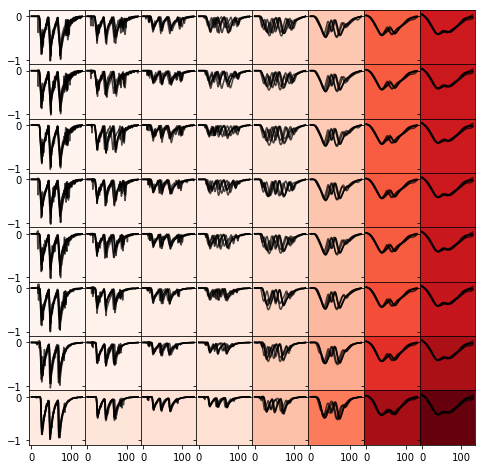

In [22]:
cmap = plt.get_cmap('Reds')
cvals = mean_test_error - np.min(mean_test_error)
cvals /= np.max(cvals)

gridshape = summary['warp_penalties'].shape
fig, axes = plt.subplots(*gridshape, sharex=True, sharey=True, figsize=(8,8))
for i, j in itertools.product(*[range(s) for s in gridshape]):
    [axes[i,j].plot(r['params']['time'], '-k', alpha=0.7) for r in results[i, j]]
    [axes[i,j].set_facecolor(cmap(cvals[i, j]))]
fig.subplots_adjust(hspace=0, wspace=0)

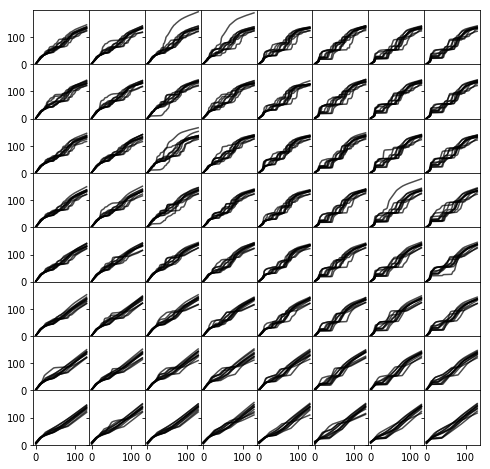

In [5]:
gridshape = summary['warp_penalties'].shape
fig, axes = plt.subplots(*gridshape, sharex=True, sharey=True, figsize=(8,8))
for i, j in itertools.product(*[range(s) for s in gridshape]):
    axes[i,j].plot(results[i, j][0]['params']['warp'][:10].T, '-k', alpha=0.7)
#     if j == 0:
#         axes[i,j].set_ylabel(summary['warp_penalties'][i, j])
#     if i == gridshape[0]-1:
#         axes[i,j].set_xlabel(summary['time_penalties'][i, j])
axes[0,0].set_ylim([0,200])
axes[0,0].set_yticks([0,100])
fig.subplots_adjust(hspace=0, wspace=0)